# Classification

## Marcin Biela

Ex.1

In [21]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
iris_X = (iris_X - iris_X.mean()) / iris_X.std()
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris_X, iris_Y, test_size=0.3)
 #An example of using the Euclidean distance
a = (1, 2, 3)
b = (4, 5, 6)
dst = distance.euclidean(a, b)
print(dst)
# Checking the effectiveness of the classifier
# output = accuracy_score(labels_test, predictions)


5.196152422706632


**Please provide your own implementation of the “K nearest neighbors” algorithm.**

In [22]:
def fun(k,features_test,features_train,labels_train, labels_test):    
    for i in range(0, len(features_test)):
        distance_ = []
        pr0 = 0
        pr1 = 0
        pr2 = 0
        for j in range(0, len(features_train)):
            dst = distance.euclidean(features_test[i], features_train[j])
            tup = (dst, labels_train[j])
            distance_.append(tup)
        distance_.sort()
        distance_ = distance_[:k]
        species = np.matrix(distance_)
        species = species[:, 1]
        for s in species:
            if s == 0:
                pr0 += 1
            elif s == 1:
                pr1 += 1
            else:
                pr2 += 1
        if pr0 >= pr1 and pr0 >= pr2:
            predict.append(0)
        elif pr1 >= pr0 and pr1 >= pr2:
            predict.append(1)
        else:
            predict.append(2)
    return labels_test, predict

In [23]:
k=10
predict = []
[labels_test, predict] = fun(k,features_test,features_train,labels_train, labels_test)
print("labels test: ", list(labels_test))
print("Predict: ", predict)


labels test:  [1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1]
Predict:  [1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1]


In [24]:
output = accuracy_score(labels_test, predict)
print(f" Accurracy: {output:.2f}")

 Accurracy: 0.98


Ex.2 **kNN - Python (sklearn)**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target
iris_X = (iris_X - iris_X.mean()) / iris_X.std() 
features_train, features_test, labels_train, labels_test = train_test_split(iris_X, iris_Y, test_size=0.3)
k = 10
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
knn.fit(features_train, labels_train)
predict = knn.predict(features_test)
output_1 = accuracy_score(labels_test, predict)
print(f" Accurracy: {output_1:.2f}")

 Accurracy: 0.96


Ex.3 **Decision Tree**

In [26]:
from sklearn.datasets import load_iris
from sklearn import tree
import os
from six import StringIO  
import pydot 

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_png('iris.png')

Import libraries

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from scipy.io import loadmat

Plot Mnist function

In [28]:
def plot_mnist(images, titles, h, w, n_row=3, col=4):
    plt.figure(figsize=(1.8 * col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * col):
        plt.subplot(n_row, col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

Liczba cyfr:  60000
Liczba pikseli w jednym obrazie:  784


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


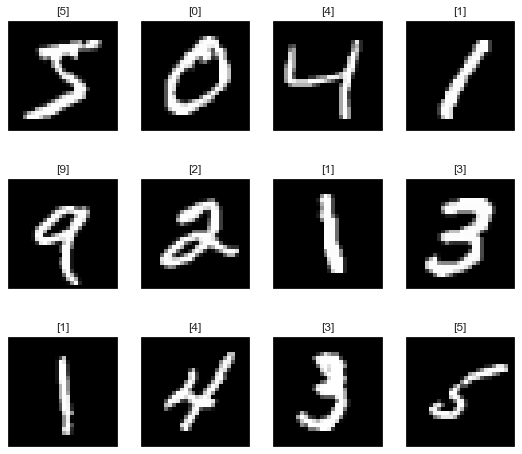

In [29]:
data = loadmat('mnist.mat')
# dane = loadmat("https://github.com/Marcin279/Machine_Learning/blob/main/lab4_classifiaction/mnist.mat")
features_train= data['trainX']
labels_train = data['trainY']
features_test=data['testX']
labels_test=data['testY']
labels_train=labels_train.T
labels_test=labels_test.T
height = 28
weight = 28
print("Liczba cyfr: ", features_train.shape[0])
print('Liczba pikseli w jednym obrazie: ', features_train.shape[1])
plot_mnist(features_train, labels_train, height, weight)
plt.show()

In [30]:
DEPTH = 10
tree = tree.DecisionTreeClassifier(max_depth=DEPTH)
tree.fit(features_train, labels_train)
predict = tree.predict(features_test)
f1 = f1_score(labels_test, predict, average='weighted')
print('F1 Score = ', f1)
c = confusion_matrix(labels_test, predict)
print(c)
report = classification_report(labels_test, predict)
print(report)

F1 Score =  0.8662704167257592
[[ 915    0    9   10    6   10    9    5   13    3]
 [   1 1087   12   16    2    5    2    1    9    0]
 [  13   11  863   21   24   11    9   36   34   10]
 [   8    4   35  846    7   47    3   19   23   18]
 [   3    4    7   11  833    9   11    9   27   68]
 [  15   10    4   50   13  718   20    8   30   24]
 [  24    5   13    8   32   17  833    1   23    2]
 [   2   14   24   10   10    6    1  906   11   44]
 [  10   10   27   38   15   25   18    8  795   28]
 [  13    3    7   31   24   16    5   13   31  866]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.81      0.84      0.82      1010
           4       0.86      0.85      0.86       982
           5       0.83      0.80      0.82       892
           6       0.91      0.87      0.89       958
     

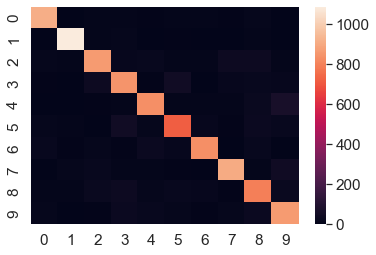

In [31]:
# Heatmap

import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(c, range(10), range(10))

sn.set(font_scale=1.4)
sn.heatmap(df_cm)
plt.show()